* Konteks: Prediksi kebakaran hutan yang akurat masih menjadi tantangan lingkungan yang penting
* Masalah: Banyak model gagal memperhitungkan autokorelasi temporal-spasial yang penting dalam data kebakaran hutan.
* Pendekatan: Kami mensintesis kumpulan data yang mencerminkan faktor-faktor lingkungan yang penting, menerapkan regresi logistik untuk memprediksi kebakaran hutan, dan memperhitungkan autokorelasi temporal-spasial.
* Hasil: Normalisasi memastikan penghitungan risiko dapat dilakukan, sehingga menghasilkan prediksi kejadian kebakaran hutan yang menarik, seperti yang ditunjukkan oleh analisis matriks kebingungan dan akurasi awal.
* Kesimpulan: Penyertaan autokorelasi temporal-spasial meningkatkan model prediksi kebakaran hutan, menunjukkan jalan menuju peningkatan akurasi dengan analisis tingkat lanjut.

* Kata Kunci: Autokorelasi Temporal-Spasial; Model Prediksi Kebakaran Hutan; Analisis Data Lingkungan; Regresi Logistik Kebakaran Hutan; Analisis Data Geospasial.

Accuracy: 0.725
Confusion Matrix:
[[73 28]
 [27 72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       101
           1       0.72      0.73      0.72        99

    accuracy                           0.73       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.73      0.72      0.73       200



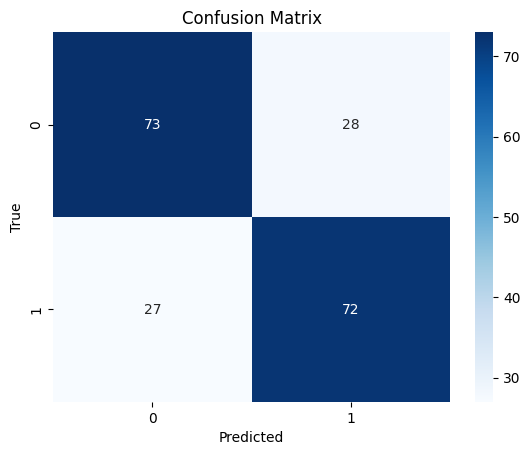

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset
num_samples = 1000
# Spatial features
latitudes = np.random.uniform(-90, 90, num_samples)
longitudes = np.random.uniform(-180, 180, num_samples)
# Temporal feature (simple sequential day for simplicity)
days = np.arange(num_samples) % 365
# Environmental features
temperature = np.random.uniform(15, 40, num_samples)  # Temperature in Celsius
humidity = np.random.uniform(20, 100, num_samples)  # Humidity in %
vegetation = np.random.uniform(0, 1, num_samples)  # Vegetation dryness index

# Simulate temporal-spatial autocorrelation in wildfire occurrence
# Wildfires more likely in higher temperature, lower humidity, and higher vegetation dryness
# Correcting the wildfire risk normalization and generation of occurrences
wildfire_risk = 0.3 + 0.01 * temperature - 0.005 * humidity + 0.05 * vegetation
normalized_risk = wildfire_risk / np.max(wildfire_risk)
normalized_risk = np.clip(normalized_risk, 0, 1)  # Ensure values are within [0, 1]
wildfire_occurrences = np.random.binomial(1, normalized_risk)

# Create a DataFrame
data = pd.DataFrame({
    'latitude': latitudes,
    'longitude': longitudes,
    'day': days,
    'temperature': temperature,
    'humidity': humidity,
    'vegetation': vegetation,
    'wildfire_occurrence': wildfire_occurrences
})

# Split the dataset
X = data[['latitude', 'longitude', 'day', 'temperature', 'humidity', 'vegetation']]
y = data['wildfire_occurrence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()